# Metropolis Algorithm - Hopefield Network

Ismael CM
19/12/2022

In [383]:
import numpy as np
import matplotlib.pyplot as plt

In [384]:
def read_patern(path='Patern/patern.txt'):
	patern = np.loadtxt(path, delimiter=',', dtype=np.uint8)
	return patern

In [397]:
def patern2point(patern):
	"""Convert a patern (matrix) to a list of points (x,y) where matrix[i][j] == 1
	
	x = j and y = -i + len(patern)

	Explenation:
		j selects the row (vertical movement) and i selects the column (horizontal movement)
		In a plot, x corresponds to the horizontal axis and y to the vertical axis

		Reversing i (i.e. -i) is necessary because the matrix is read from top to bottom. This is the same as reversing the y axis in a plot, so now everything is in the 4th quadrant.
		Adding len(patern) traslates everything to the 1st quadrant.
	"""
	x = []
	y = []
	for i in range(len(patern)): 			# i is the row
		for j in range(len(patern[i])): 	# j is the column
			if patern[i][j] == 1:
				x.append(j) 		    	
				y.append(-i + len(patern)) 
	return x,y

In [412]:
def average(net):
	return np.average(net)

In [454]:
def interaction(net):
	a = average(net)
	N = len(net)
	w = np.zeros((N, N, N, N)) 		# All zeros 
	for i in range(N):
		for j in range(N):
			for k in range(N):
				for l in range(N):
					if (i != k) and (j != l): 	# so no need to do the case where i,j == k,l
						w[i][j][k][l] = (net[i][j] - a)*(net[k][l] - a)/N**2
						
	return w

In [388]:
def interaction2(net, N):
	# needs testing
	a = average(net)
	w = np.zeros((N, N, N, N)) 		# All zeros 
	for i in range(1, N):
		for j in range(i, N):
			for k in range(1, N):
				for l in range(k, N):
					if (i, j) != (k, l): 	# so no need to do the case where i,j == k,l
						w[i][j][k][l] = (net[i][j] - a)*(net[k][l] - a)/N**2
						w[k][l][i][j] = w[i][j][k][l]

	return w

In [455]:
def activation(net):
	N = len(net)
	w = interaction(net)
	theta = np.zeros((N, N))
	for i in range(N):
		for j in range(N):
			for k in range(N):
				for l in range(N):
					theta[i][j] += 0.5*w[i][j][k][l]
	return theta 

In [456]:
def difH(i, j, net, omega, theta):
	H = 0 
	N = len(net)
	for k in range(N):
		for l in range(N):
			if (k != i) and (l != j):
				H += omega[i][j][k][l]*net[i][j]

	H = (2*net[i][j]-1)*(H - theta[i][j]) 

	return H 


In [424]:
def Hamilt(net, omega, theta):
	H = 0 
	N = len(net)
	for i in range(N):
		for j in range(N):
			H += theta[i][j]*net[i][j]
			for k in range(N):
				for l in range(N):
					H += -0.5*omega[i][j][k][l]*net[i][j]*net[k][l]
	return H

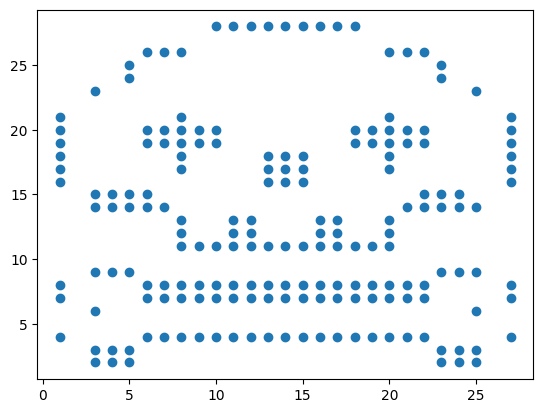

In [457]:
skull = read_patern("patern/skull.txt")
x, y = patern2point(skull)
plt.scatter(x, y)
plt.show()

In [458]:
# Learning fase
omega = interaction(skull)
theta = activation(skull)

In [459]:
# Active fase
net = np.zeros((len(skull), len(skull)), dtype=np.uint8)
pMC = 15
N = len(net)
T = 0.0001
for k in range(pMC):
	# if k%10 == 0:
		# Plot
	plt.figure()
	plt.imshow(net, cmap='binary')
	plt.title(f"pMC = {k+1}")
	plt.savefig(f"Plot/pMC{k+1}.png")
	plt.close()
	
	print(f"Paso MoneteCarlo {k+1}")
	x = np.random.randint(0, N, size = N)
	y = np.random.randint(0, N, size = N)
	for i in range(N):
		for j in range(N):
			p = np.exp(-difH(x[i], y[j], net, omega, theta)/T)
			if p > 1:
				p=1
			if np.random.random() < p:
				net[x[i]][y[j]] = 1 - net[x[i]][y[j]]

Paso MoneteCarlo 1
Paso MoneteCarlo 2
Paso MoneteCarlo 3
Paso MoneteCarlo 4
Paso MoneteCarlo 5
Paso MoneteCarlo 6
Paso MoneteCarlo 7
Paso MoneteCarlo 8
Paso MoneteCarlo 9
Paso MoneteCarlo 10
Paso MoneteCarlo 11
Paso MoneteCarlo 12
Paso MoneteCarlo 13
Paso MoneteCarlo 14
Paso MoneteCarlo 15


In [432]:
iters = 5
x = np.random.randint(0, N, iters)
y = np.random.randint(0, N, iters)

omega = interaction(skull)
theta = activation(skull)

s = skull.copy()

for i in range(iters):
	for j in range(iters):
		s = skull.copy()
		H1 = difH(x[i], y[j], net, omega, theta)
		s[x[i]][y[j]] = 1 - s[x[i]][y[j]]
		H2 = Hamilt(s, omega, theta)
		if H2 != H1:
			print("Error")
		else:
			print("OK")

Error
Error
Error
Error
Error
Error
Error


KeyboardInterrupt: 